In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

##reading data from CSV file
data = pd.read_csv("C:\\Users\\islam\\OneDrive\\Desktop\\CSE445ML\\cleaned_data.csv")

data

,user_id,age,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,...,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day,gender_Female,gender_Male,gender_Other,location_type_Rural,location_type_Suburban,location_type_Urban
0,user_1,51,4.8,3.4,1.3,1.6,1.6,4.1,2.0,1.0,...,125.2,13,15,4.0,1.0,0.0,0.0,0.0,0.0,1.0
1,user_2,64,3.9,3.5,1.8,0.9,2.0,2.7,3.1,1.0,...,150.4,19,18,6.5,0.0,1.0,0.0,0.0,1.0,0.0
2,user_3,41,10.5,2.1,2.6,0.7,2.2,3.0,2.8,4.1,...,187.9,7,3,6.9,0.0,0.0,1.0,0.0,1.0,0.0
3,user_4,27,8.8,0.0,0.0,0.7,2.5,3.3,1.6,1.3,...,73.6,7,2,4.8,0.0,0.0,1.0,1.0,0.0,0.0
4,user_5,55,5.9,1.7,1.1,1.5,1.6,1.1,3.6,0.8,...,217.5,8,10,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,user_1996,58,5.6,4.0,2.5,0.3,1.5,1.1,1.2,2.1,...,164.9,20,17,4.9,1.0,0.0,0.0,0.0,0.0,1.0
1996,user_1997,62,3.9,3.1,1.0,1.5,1.1,2.7,4.1,6.4,...,172.6,15,15,25.5,1.0,0.0,0.0,0.0,0.0,1.0
1997,user_1998,64,7.4,3.0,0.0,1.4,0.9,0.8,2.6,4.1,...,101.3,1,20,9.5,1.0,0.0,0.0,0.0,0.0,1.0
1998,user_1999,19,4.2,4.4,2.3,0.9,1.4,1.7,1.2,2.0,...,123.7,1,11,13.4,0.0,1.0,0.0,0.0,0.0,1.0


In [138]:

##dropping redundant columns (user_id)
data = data.drop(columns = ['user_id'])
data

,age,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,...,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day,gender_Female,gender_Male,gender_Other,location_type_Rural,location_type_Suburban,location_type_Urban
0,51,4.8,3.4,1.3,1.6,1.6,4.1,2.0,1.0,1.7,...,125.2,13,15,4.0,1.0,0.0,0.0,0.0,0.0,1.0
1,64,3.9,3.5,1.8,0.9,2.0,2.7,3.1,1.0,1.5,...,150.4,19,18,6.5,0.0,1.0,0.0,0.0,1.0,0.0
2,41,10.5,2.1,2.6,0.7,2.2,3.0,2.8,4.1,1.7,...,187.9,7,3,6.9,0.0,0.0,1.0,0.0,1.0,0.0
3,27,8.8,0.0,0.0,0.7,2.5,3.3,1.6,1.3,0.4,...,73.6,7,2,4.8,0.0,0.0,1.0,1.0,0.0,0.0
4,55,5.9,1.7,1.1,1.5,1.6,1.1,3.6,0.8,0.8,...,217.5,8,10,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,58,5.6,4.0,2.5,0.3,1.5,1.1,1.2,2.1,0.8,...,164.9,20,17,4.9,1.0,0.0,0.0,0.0,0.0,1.0
1996,62,3.9,3.1,1.0,1.5,1.1,2.7,4.1,6.4,1.8,...,172.6,15,15,25.5,1.0,0.0,0.0,0.0,0.0,1.0
1997,64,7.4,3.0,0.0,1.4,0.9,0.8,2.6,4.1,2.5,...,101.3,1,20,9.5,1.0,0.0,0.0,0.0,0.0,1.0
1998,19,4.2,4.4,2.3,0.9,1.4,1.7,1.2,2.0,0.7,...,123.7,1,11,13.4,0.0,1.0,0.0,0.0,0.0,1.0


In [139]:
#shuffling the data 
data = data.sample(frac = 1, random_state = 10)
data

,age,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,...,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day,gender_Female,gender_Male,gender_Other,location_type_Rural,location_type_Suburban,location_type_Urban
115,47,7.4,2.8,2.5,0.9,2.6,4.3,2.0,1.6,1.1,...,179.5,9,9,16.6,0.0,1.0,0.0,1.0,0.0,0.0
1779,16,7.0,1.8,2.0,1.3,0.4,2.2,0.9,3.9,0.0,...,185.9,17,8,14.4,0.0,1.0,0.0,0.0,1.0,0.0
1449,32,7.2,4.5,2.4,1.2,1.9,2.7,1.1,3.0,0.5,...,172.5,8,4,15.6,0.0,1.0,0.0,0.0,1.0,0.0
145,17,2.9,3.5,0.0,0.5,0.4,3.3,0.7,2.6,1.1,...,98.7,0,10,6.2,1.0,0.0,0.0,0.0,0.0,1.0
1009,51,7.7,0.7,1.4,1.8,2.0,1.2,0.0,2.2,0.6,...,76.7,10,19,6.3,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,58,8.2,3.3,0.0,1.0,2.4,3.1,3.3,3.8,1.0,...,99.8,14,1,8.5,1.0,0.0,0.0,0.0,0.0,1.0
1344,32,6.2,3.8,1.4,0.9,2.2,2.0,2.0,4.1,1.2,...,171.1,7,3,15.2,0.0,1.0,0.0,1.0,0.0,0.0
527,33,4.8,0.5,3.1,0.6,1.4,0.5,1.6,2.1,1.5,...,125.7,18,12,9.1,0.0,1.0,0.0,0.0,0.0,1.0
1149,53,3.5,0.0,1.9,0.6,0.0,1.8,0.5,5.3,1.5,...,84.3,6,15,5.7,1.0,0.0,0.0,0.0,0.0,1.0


In [140]:
#defining X(input features) and Y(output target)
X = data.drop(columns = 'mental_health_score')
Y = data['mental_health_score']


X

,age,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,...,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day,gender_Female,gender_Male,gender_Other,location_type_Rural,location_type_Suburban,location_type_Urban
115,47,7.4,2.8,2.5,0.9,2.6,4.3,2.0,1.6,1.1,...,179.5,9,9,16.6,0.0,1.0,0.0,1.0,0.0,0.0
1779,16,7.0,1.8,2.0,1.3,0.4,2.2,0.9,3.9,0.0,...,185.9,17,8,14.4,0.0,1.0,0.0,0.0,1.0,0.0
1449,32,7.2,4.5,2.4,1.2,1.9,2.7,1.1,3.0,0.5,...,172.5,8,4,15.6,0.0,1.0,0.0,0.0,1.0,0.0
145,17,2.9,3.5,0.0,0.5,0.4,3.3,0.7,2.6,1.1,...,98.7,0,10,6.2,1.0,0.0,0.0,0.0,0.0,1.0
1009,51,7.7,0.7,1.4,1.8,2.0,1.2,0.0,2.2,0.6,...,76.7,10,19,6.3,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,58,8.2,3.3,0.0,1.0,2.4,3.1,3.3,3.8,1.0,...,99.8,14,1,8.5,1.0,0.0,0.0,0.0,0.0,1.0
1344,32,6.2,3.8,1.4,0.9,2.2,2.0,2.0,4.1,1.2,...,171.1,7,3,15.2,0.0,1.0,0.0,1.0,0.0,0.0
527,33,4.8,0.5,3.1,0.6,1.4,0.5,1.6,2.1,1.5,...,125.7,18,12,9.1,0.0,1.0,0.0,0.0,0.0,1.0
1149,53,3.5,0.0,1.9,0.6,0.0,1.8,0.5,5.3,1.5,...,84.3,6,15,5.7,1.0,0.0,0.0,0.0,0.0,1.0


In [141]:
##feature scaling since DBSCAN requires scaling
scaler = StandardScaler().set_output(transform='pandas')
data_scaled = scaler.fit_transform(X)
data_scaled

,age,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,...,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day,gender_Female,gender_Male,gender_Other,location_type_Rural,location_type_Suburban,location_type_Urban
115,0.549028,0.696382,-0.154378,0.501203,-0.194177,1.143453,1.995143,-0.009186,-0.701427,-0.200721,...,0.643220,-0.147270,-0.173336,0.796662,-0.936981,1.125866,-0.317357,2.012587,-0.658553,-0.999000
1779,-1.527959,0.493710,-0.844492,0.000050,0.617855,-1.151171,0.141905,-0.994998,1.158585,-1.430766,...,0.774238,1.180234,-0.338575,0.496870,-0.936981,1.125866,-0.317357,-0.496873,1.518481,-0.999000
1449,-0.455966,0.595046,1.018815,0.400972,0.414847,0.413345,0.583152,-0.815759,0.430754,-0.871655,...,0.499920,-0.313208,-0.999533,0.660393,-0.936981,1.125866,-0.317357,-0.496873,1.518481,-0.999000
145,-1.460959,-1.583681,0.328701,-2.004561,-1.006210,-1.151171,1.112649,-1.174236,0.107274,-0.200721,...,-1.010876,-1.640712,-0.008097,-0.620534,1.067257,-0.888205,-0.317357,-0.496873,-0.658553,1.001001
1009,0.817026,0.848386,-1.603617,-0.601333,1.632896,0.517646,-0.740589,-1.801571,-0.216206,-0.759832,...,-1.461248,0.018668,1.479058,-0.606907,-0.936981,-0.888205,3.151026,-0.496873,1.518481,-0.999000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,1.286023,1.101726,0.190678,-2.004561,0.008831,0.934851,0.936150,1.155864,1.077715,-0.312543,...,-0.988357,0.682420,-1.495251,-0.307116,1.067257,-0.888205,-0.317357,-0.496873,-0.658553,1.001001
1344,-0.455966,0.088365,0.535735,-0.601333,-0.194177,0.726248,-0.034594,-0.009186,1.320325,-0.088899,...,0.471260,-0.479146,-1.164772,0.605885,-0.936981,1.125866,-0.317357,2.012587,-0.658553,-0.999000
527,-0.388966,-0.620988,-1.741639,1.102586,-0.803202,-0.108160,-1.358335,-0.367663,-0.297076,0.246568,...,-0.458146,1.346172,0.322382,-0.225355,-0.936981,1.125866,-0.317357,-0.496873,-0.658553,1.001001
1149,0.951025,-1.279673,-2.086696,-0.100180,-0.803202,-1.568375,-0.211093,-1.353475,2.290766,0.246568,...,-1.305665,-0.645084,0.818100,-0.688669,1.067257,-0.888205,-0.317357,-0.496873,-0.658553,1.001001


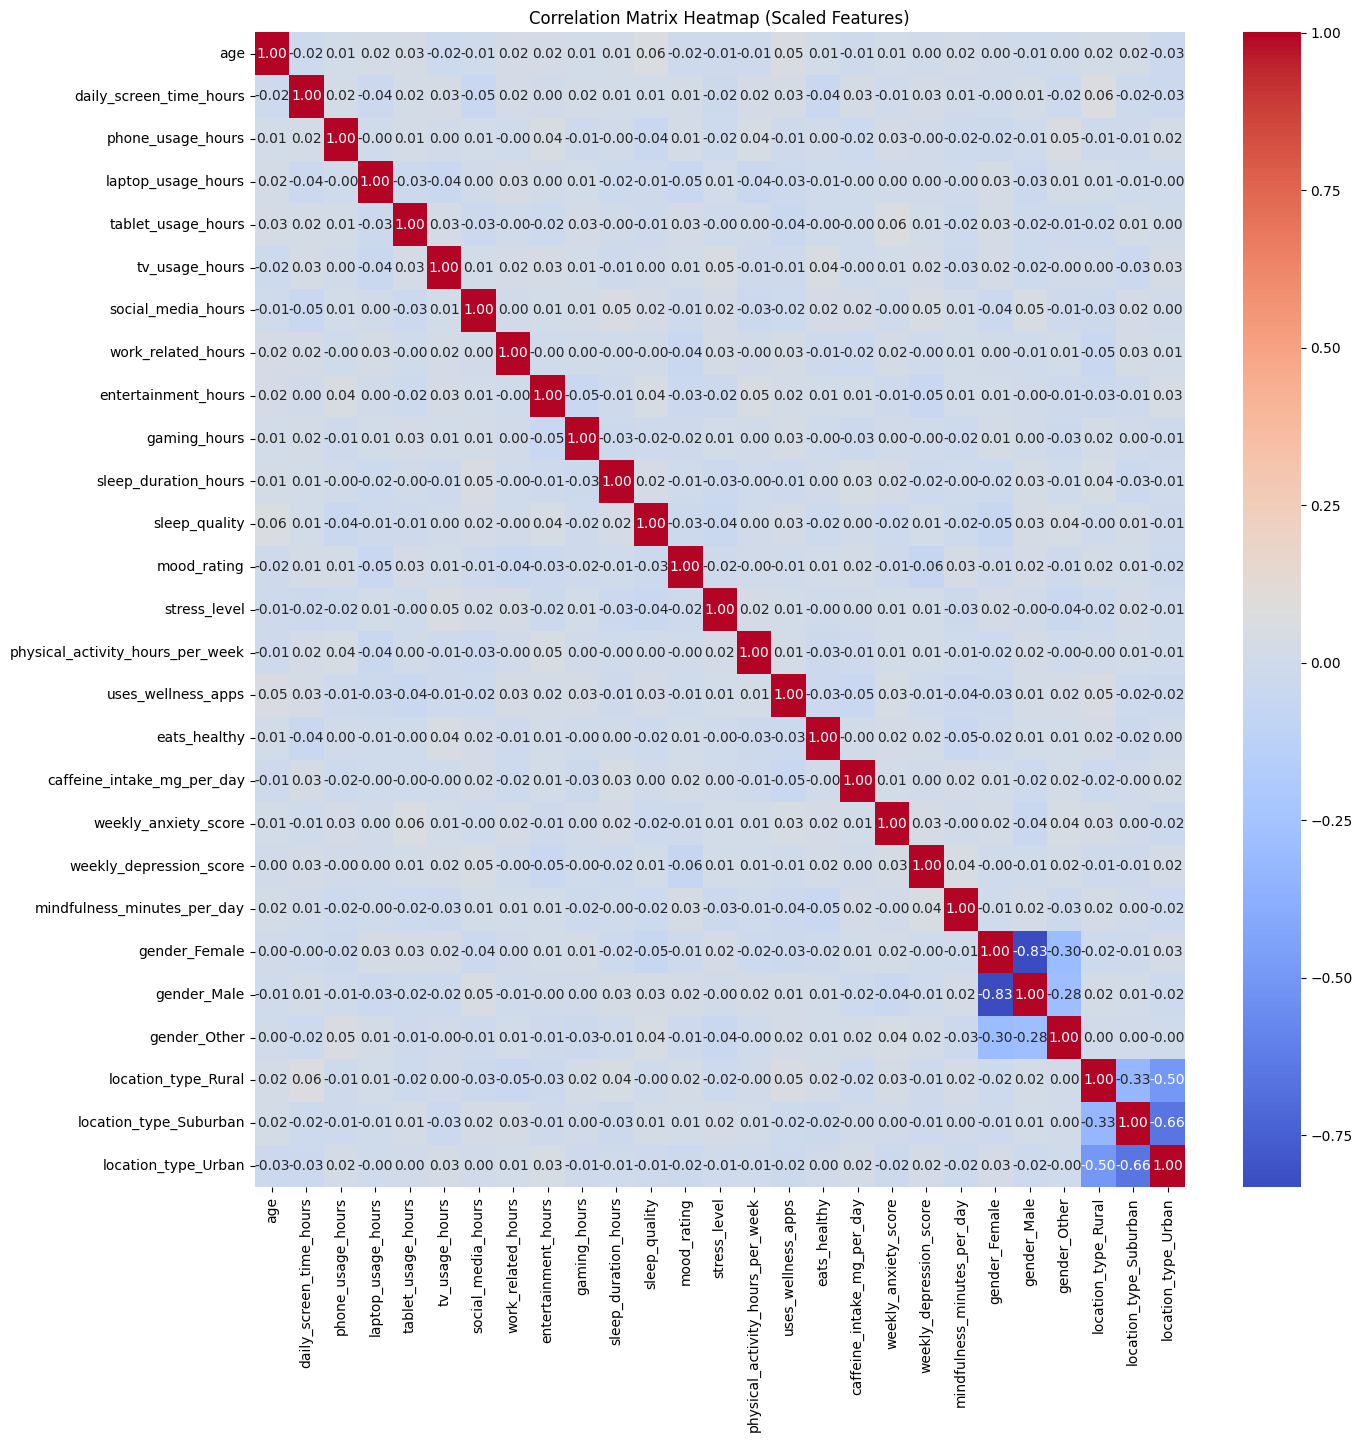

In [142]:
# Compute covariance matrix
cov_matrix = data_scaled.cov()

# Plot heatmap
plt.figure(figsize=(15,15))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix Heatmap (Scaled Features)")
plt.show()

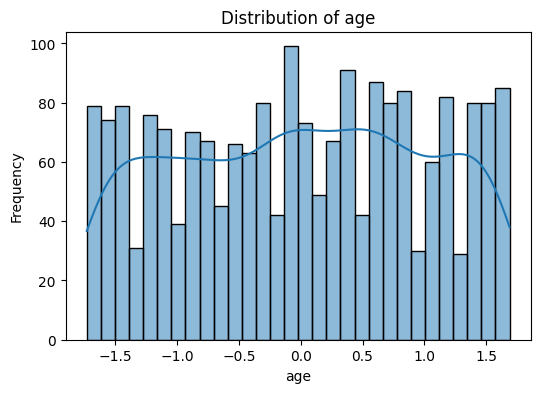

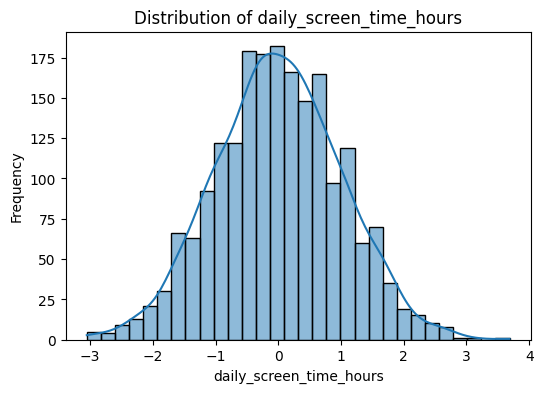

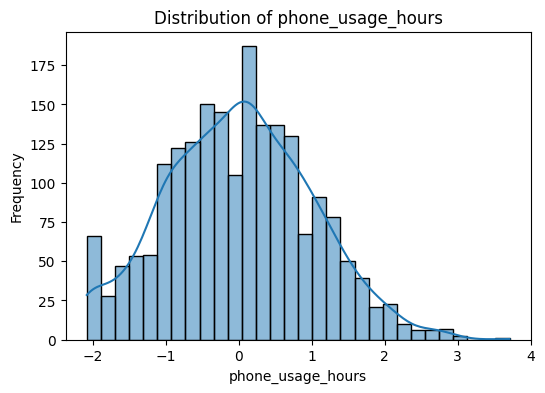

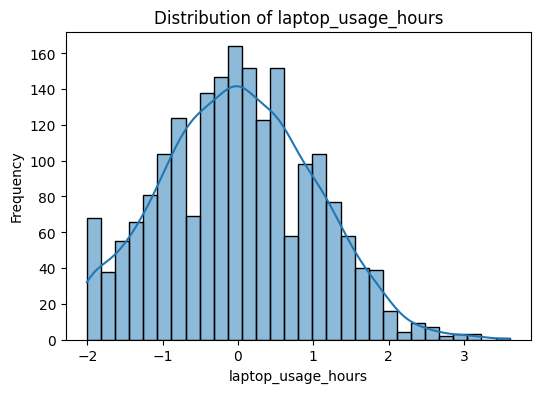

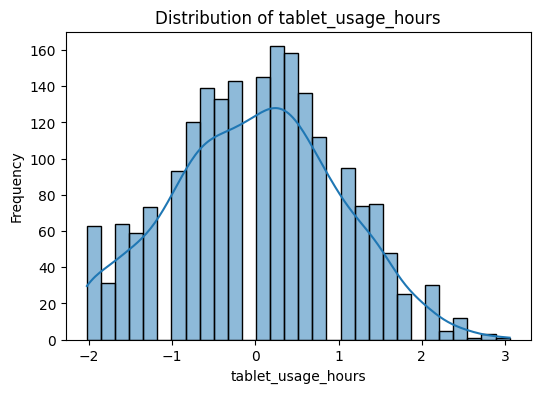

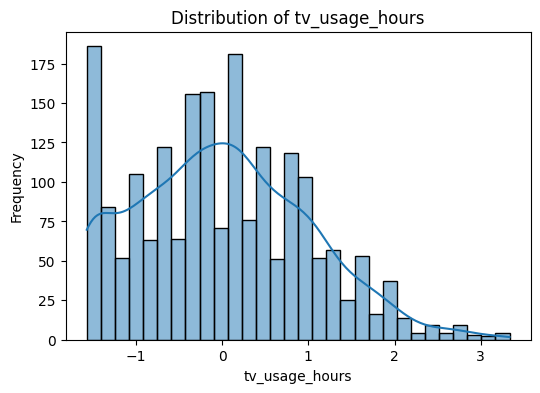

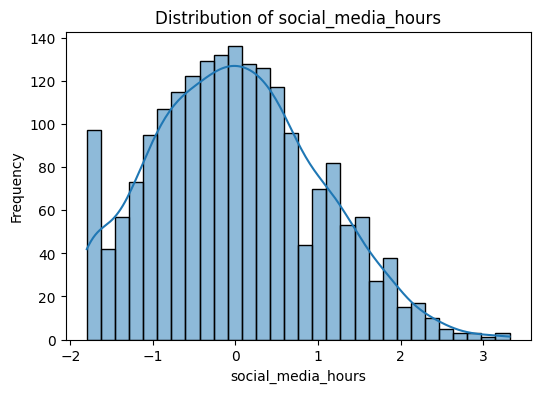

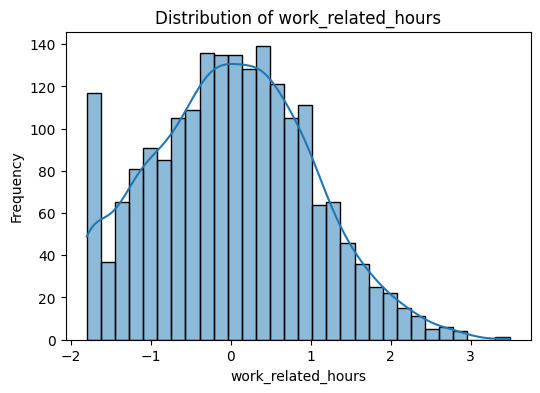

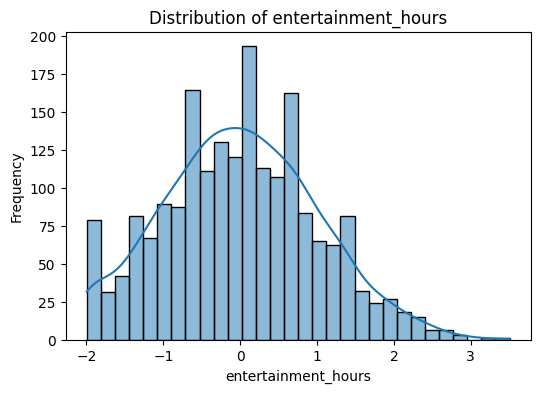

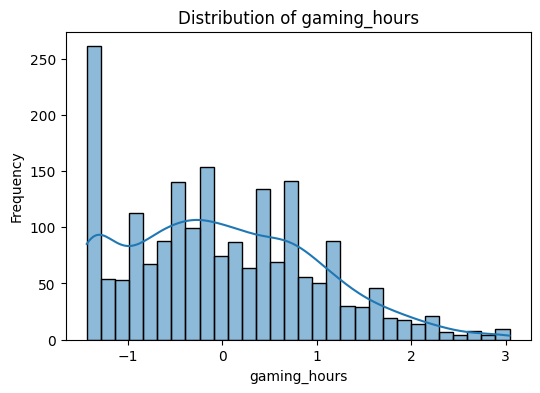

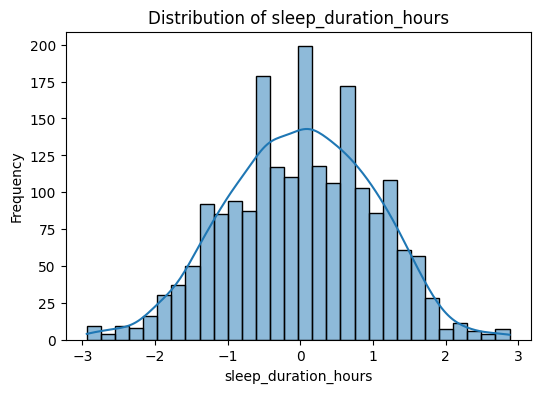

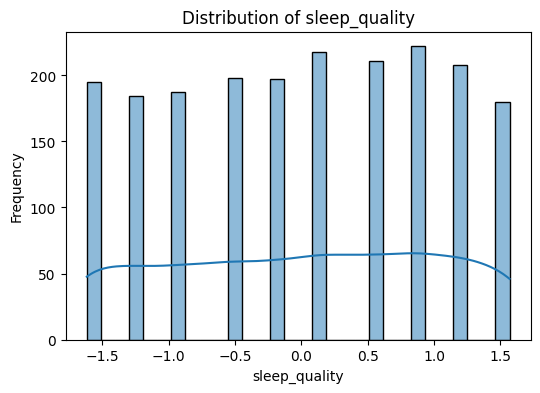

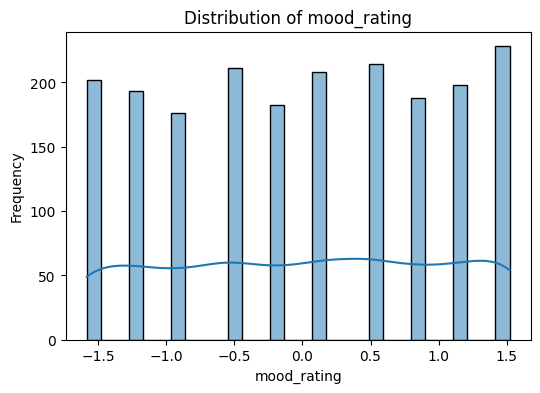

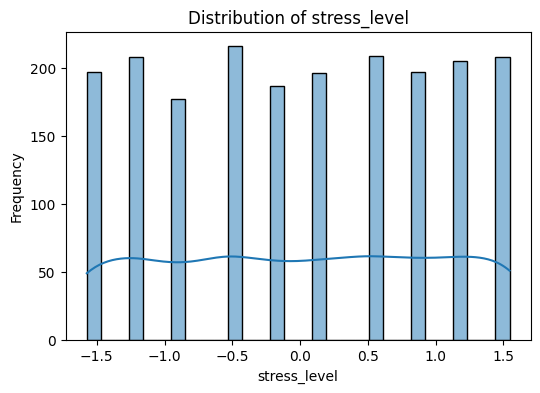

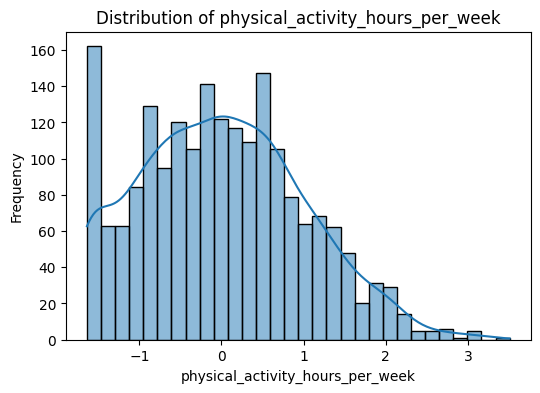

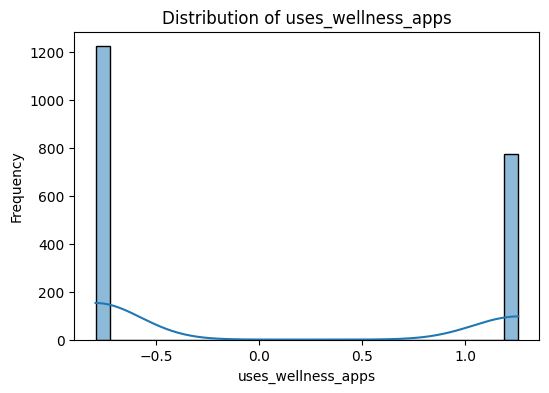

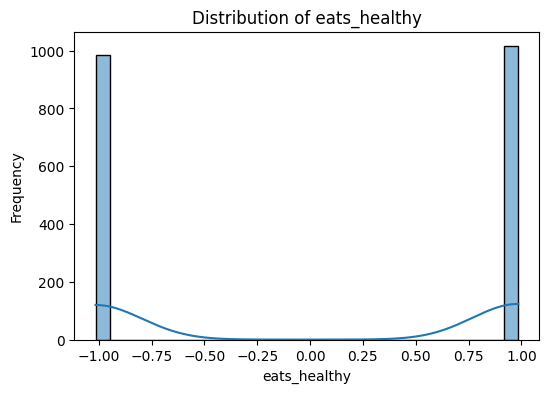

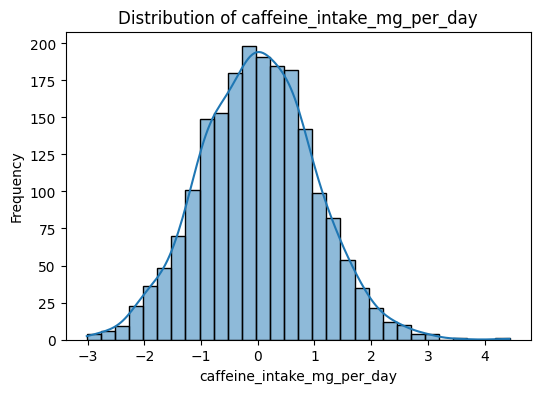

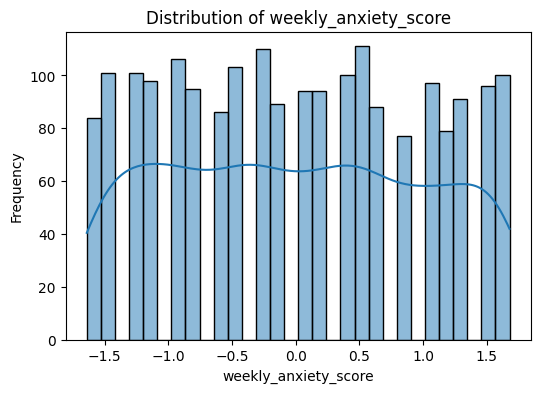

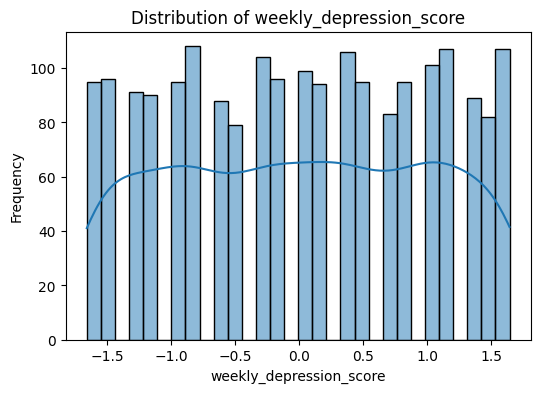

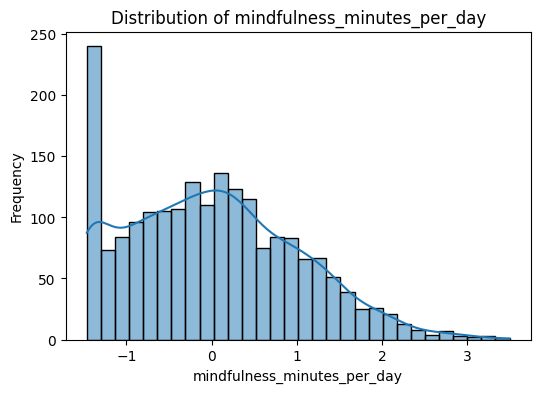

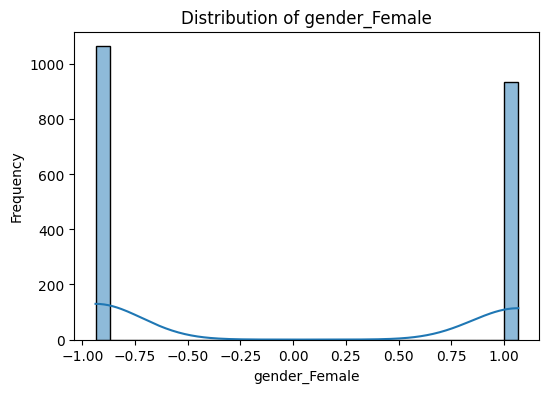

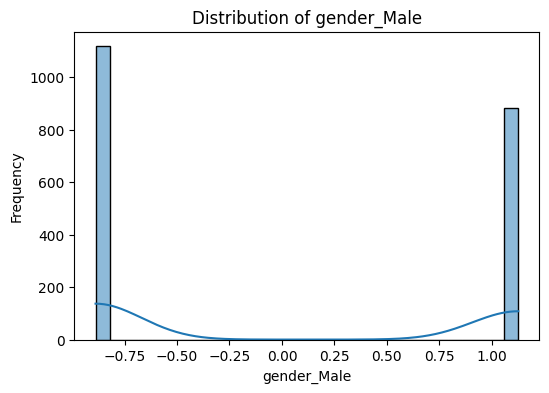

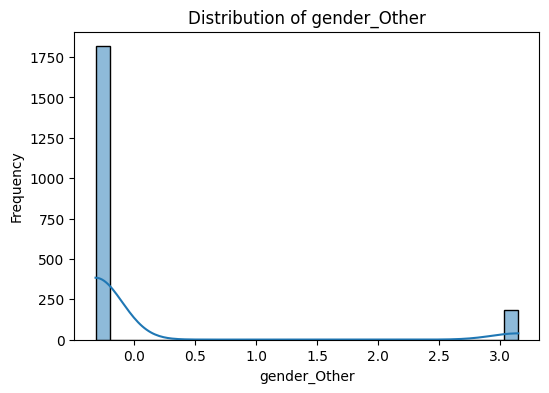

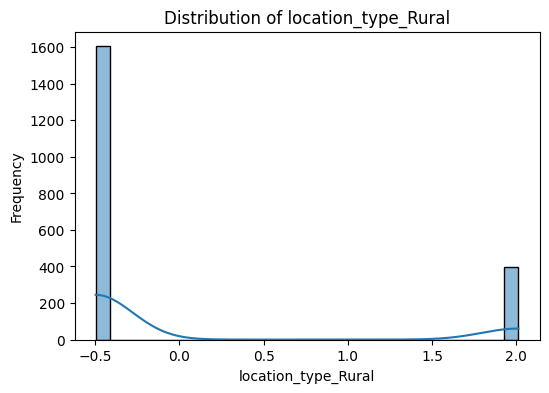

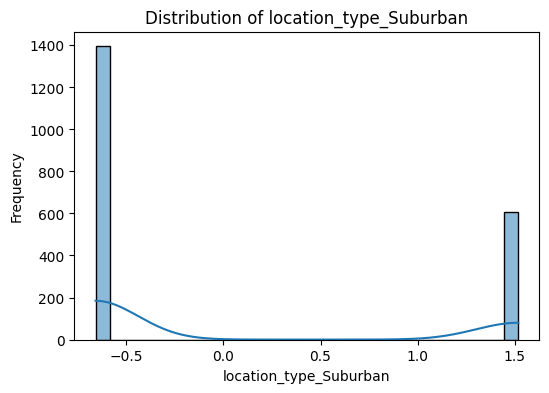

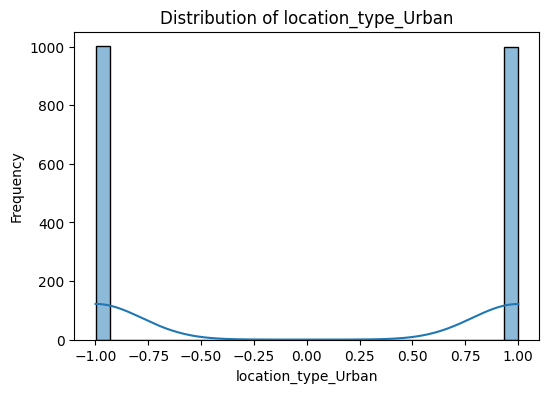

In [143]:
##visualizing distribution of each feature
for col in data_scaled.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(data_scaled[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [144]:
data_scaled.shape

(2000, 27)

In [145]:
#defining the parameters 
number_of_features = 27
min_pts = number_of_features + 1  ##from literature min_pts = D+1
neigh = NearestNeighbors(n_neighbors = min_pts)  #initializing model with 'min_pts' number of neighbours
neigh.fit(data_scaled) ##fitting model with my scaled dataset 
distance, _ = neigh.kneighbors(data_scaled)   ##finding k nearest neighbours for each sample ignoring the indices of the nearest neighbors
distance


array([[0.00000000e+00, 4.20337190e+00, 4.32286094e+00, ...,
        5.13323140e+00, 5.13799039e+00, 5.17472717e+00],
       [8.42936970e-08, 4.05880125e+00, 4.13200842e+00, ...,
        4.90875434e+00, 4.94592898e+00, 4.96179368e+00],
       [0.00000000e+00, 3.33255203e+00, 3.43739478e+00, ...,
        4.48405266e+00, 4.57326882e+00, 4.60431954e+00],
       ...,
       [0.00000000e+00, 3.87192214e+00, 4.14886492e+00, ...,
        4.84771455e+00, 4.85164667e+00, 4.87006465e+00],
       [8.42936970e-08, 3.68779262e+00, 4.25094126e+00, ...,
        5.10273915e+00, 5.10516739e+00, 5.14808062e+00],
       [8.42936970e-08, 3.24812327e+00, 3.48207522e+00, ...,
        4.88120989e+00, 4.93157702e+00, 4.94636674e+00]], shape=(2000, 28))

In [146]:
distance = np.sort(distance[:, min_pts-1])  #sorting the (min_pts - 1)th distance of every sample
distance


array([4.23777555, 4.30524833, 4.30542975, ..., 6.75926089, 6.83128551,
       7.31712642], shape=(2000,))

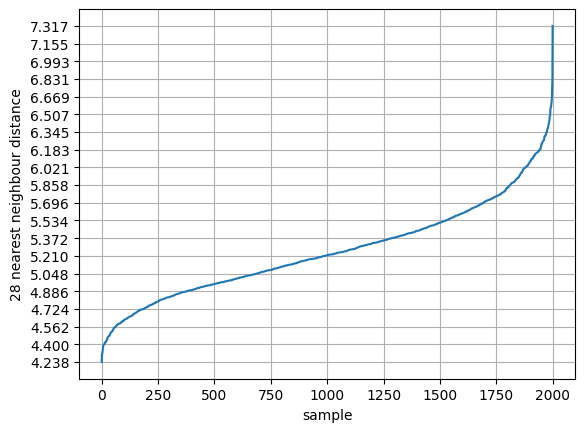

In [147]:
#generating more number of tics to understand the value of epsilon
yticks = np.linspace(min(distance), max(distance), 20)
plt.yticks(yticks)
plt.xlabel('sample')
plt.ylabel(f'{min_pts} nearest neighbour distance')
plt.grid(True)
plt.plot(distance)
plt.show()



In [148]:
epsilon = 5.7 ##chose epsilon from elbow point in graph at 5.7
dbscan = DBSCAN(eps = epsilon, min_samples = min_pts)
clusters = dbscan.fit_predict(data_scaled)
clusters

array([0, 0, 0, ..., 0, 0, 0], shape=(2000,))

In [149]:
np.unique(clusters) ##identifying unique clusters 
                    ##only single cluster could be due to curse of dimensionality

array([-1,  0])

In [150]:
clustered_data = data_scaled.copy()
clustered_data['cluster'] = clusters
clustered_data['mental_health_score'] = Y
clustered_data

,age,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,...,weekly_depression_score,mindfulness_minutes_per_day,gender_Female,gender_Male,gender_Other,location_type_Rural,location_type_Suburban,location_type_Urban,cluster,mental_health_score
115,0.549028,0.696382,-0.154378,0.501203,-0.194177,1.143453,1.995143,-0.009186,-0.701427,-0.200721,...,-0.173336,0.796662,-0.936981,1.125866,-0.317357,2.012587,-0.658553,-0.999000,0,21
1779,-1.527959,0.493710,-0.844492,0.000050,0.617855,-1.151171,0.141905,-0.994998,1.158585,-1.430766,...,-0.338575,0.496870,-0.936981,1.125866,-0.317357,-0.496873,1.518481,-0.999000,0,36
1449,-0.455966,0.595046,1.018815,0.400972,0.414847,0.413345,0.583152,-0.815759,0.430754,-0.871655,...,-0.999533,0.660393,-0.936981,1.125866,-0.317357,-0.496873,1.518481,-0.999000,0,79
145,-1.460959,-1.583681,0.328701,-2.004561,-1.006210,-1.151171,1.112649,-1.174236,0.107274,-0.200721,...,-0.008097,-0.620534,1.067257,-0.888205,-0.317357,-0.496873,-0.658553,1.001001,0,28
1009,0.817026,0.848386,-1.603617,-0.601333,1.632896,0.517646,-0.740589,-1.801571,-0.216206,-0.759832,...,1.479058,-0.606907,-0.936981,-0.888205,3.151026,-0.496873,1.518481,-0.999000,0,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,1.286023,1.101726,0.190678,-2.004561,0.008831,0.934851,0.936150,1.155864,1.077715,-0.312543,...,-1.495251,-0.307116,1.067257,-0.888205,-0.317357,-0.496873,-0.658553,1.001001,0,32
1344,-0.455966,0.088365,0.535735,-0.601333,-0.194177,0.726248,-0.034594,-0.009186,1.320325,-0.088899,...,-1.164772,0.605885,-0.936981,1.125866,-0.317357,2.012587,-0.658553,-0.999000,0,77
527,-0.388966,-0.620988,-1.741639,1.102586,-0.803202,-0.108160,-1.358335,-0.367663,-0.297076,0.246568,...,0.322382,-0.225355,-0.936981,1.125866,-0.317357,-0.496873,-0.658553,1.001001,0,58
1149,0.951025,-1.279673,-2.086696,-0.100180,-0.803202,-1.568375,-0.211093,-1.353475,2.290766,0.246568,...,0.818100,-0.688669,1.067257,-0.888205,-0.317357,-0.496873,-0.658553,1.001001,0,32


In [151]:
clustered_data.groupby('cluster')['mental_health_score'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
-1,4.0,44.250000,25.889187,23.0,23.75,38.5,59.00,77.0
0,1996.0,49.661323,17.533913,20.0,35.00,49.0,64.25,80.0


In [152]:
cluster_means = clustered_data.groupby('cluster').mean()  ##analyzing mean of features for each cluster
cluster_means

,age,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,...,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day,gender_Female,gender_Male,gender_Other,location_type_Rural,location_type_Suburban,location_type_Urban,mental_health_score
cluster,,,,,,,,,,,,,,,,,,,,,
-1,-0.003718,0.519044,0.397712,-0.375814,-0.701697,0.934851,-0.387591,-0.905379,-0.074684,0.554079,...,-0.064301,0.859410,-0.249202,-0.435922,-0.888205,2.283930,0.757857,-0.114294,-0.499,44.250000
0,0.000007,-0.001040,-0.000797,0.000753,0.001406,-0.001873,0.000777,0.001814,0.000150,-0.001110,...,0.000129,-0.001722,0.000499,0.000874,0.001780,-0.004577,-0.001519,0.000229,0.001,49.661323


In [153]:
from sklearn.metrics import silhouette_score

score = silhouette_score(clustered_data, clusters)
print("Silhouette Score:", score)   #silhoutte score close to 0

Silhouette Score: 0.15255624946296475


In [154]:
#reducing to 2D data for better visualization and clustering
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)



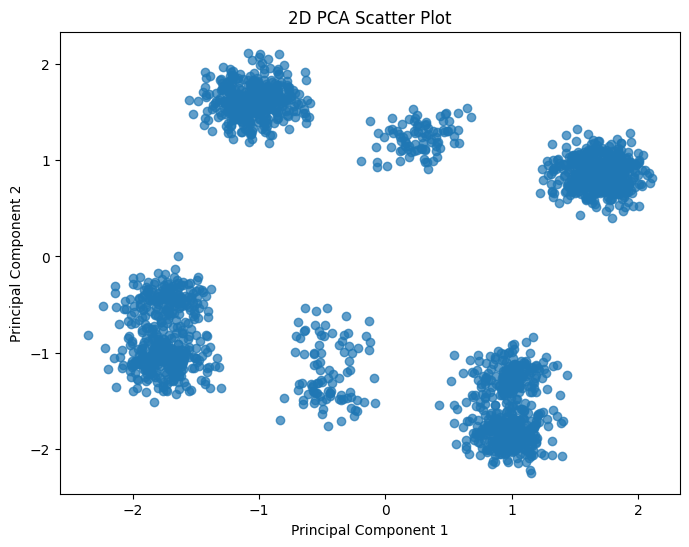

In [ ]:
##observing the 2D reduced space to detect clusters
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0], data_pca[:,1],  alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Scatter Plot")
plt.show()

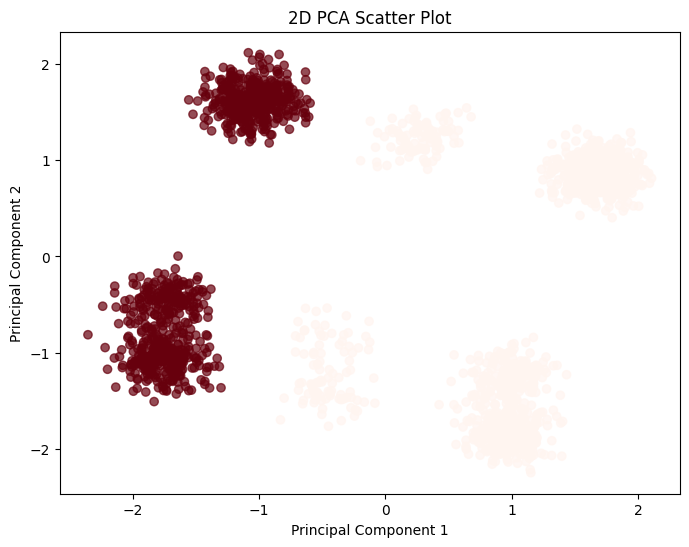

In [ ]:
##observing the 2D reduced space to detect samples with gender Male
gender_male = data_scaled['gender_Male']
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0], data_pca[:,1], c= gender_male, cmap = 'Reds', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Scatter Plot")
plt.show()

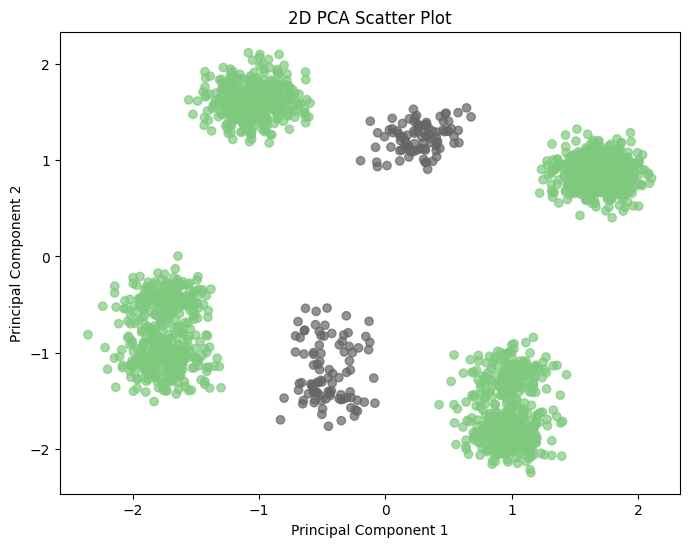

In [ ]:
##observing the 2D reduced space to detect samples with other gender
gender_other = data_scaled['gender_Other']
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0], data_pca[:,1], c= gender_other, cmap = 'Accent', alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Scatter Plot")
plt.show()

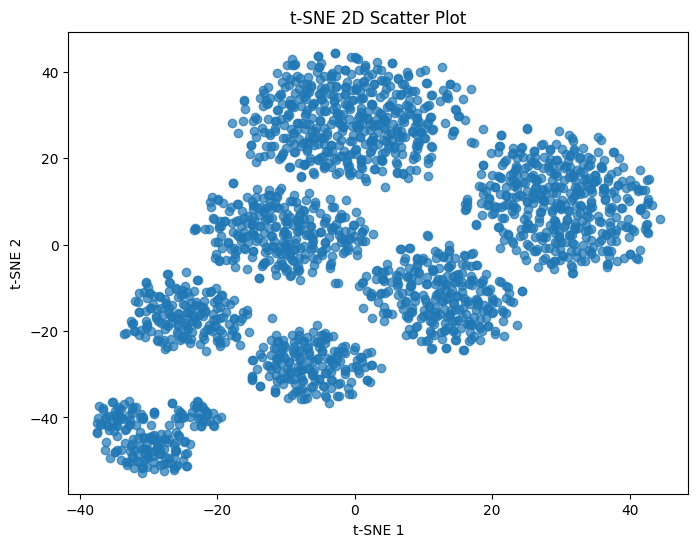

In [ ]:
##observing the 2D reduced space to detect clusters using t-SNE to confirm the results of PCA
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(data_scaled)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(tsne_data[:,0], tsne_data[:,1],  alpha=0.7)
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.title("t-SNE 2D Scatter Plot")
plt.show()


In [160]:
#applying dbscan on reduced data
#defining the parameters 
number_of_features = 2
min_pts = 5  ##from literature min_pts = 5 for data with low features
neigh = NearestNeighbors(n_neighbors = min_pts)  #initializing model with 'min_pts' number of neighbours
neigh.fit(data_pca) ##fitting model with my scaled dataset 
distance, _ = neigh.kneighbors(data_pca)   ##finding k nearest neighbours for each sample ignoring the indices of the nearest neighbors
distance


array([[0.        , 0.01814239, 0.01947718, 0.02290316, 0.03435199],
       [0.        , 0.01590008, 0.02070927, 0.02302527, 0.03113328],
       [0.        , 0.01330347, 0.01872258, 0.02300145, 0.02468401],
       ...,
       [0.        , 0.01958009, 0.04964519, 0.05758547, 0.0612632 ],
       [0.        , 0.00799019, 0.01380833, 0.01691508, 0.01970635],
       [0.        , 0.01638216, 0.02551435, 0.02993116, 0.03368929]],
      shape=(2000, 5))

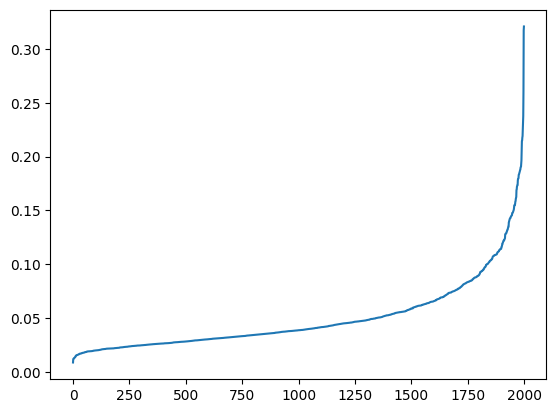

In [161]:
distance = np.sort(distance[:, min_pts-1])
plt.plot(distance)

In [ ]:
epsilon = 0.11  ##identifying elbow from PCA data which is at 0.11
dbscan = DBSCAN(eps = epsilon, min_samples = min_pts) ##applying DBSCAN on this dataset
clusters = dbscan.fit_predict(data_pca)
clusters



array([0, 0, 0, ..., 2, 4, 0], shape=(2000,))

In [171]:
pd.unique(clusters)  ##finding the unique clusters

array([ 0, -1,  1,  2,  3,  4,  5])

In [172]:
data_clustered_pca = data.copy();
data_clustered_pca['cluster'] = clusters
data_clustered_pca['mental_health_score'] = Y
data_clustered_pca

,age,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,...,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day,gender_Female,gender_Male,gender_Other,location_type_Rural,location_type_Suburban,location_type_Urban,cluster
115,47,7.4,2.8,2.5,0.9,2.6,4.3,2.0,1.6,1.1,...,9,9,16.6,0.0,1.0,0.0,1.0,0.0,0.0,0
1779,16,7.0,1.8,2.0,1.3,0.4,2.2,0.9,3.9,0.0,...,17,8,14.4,0.0,1.0,0.0,0.0,1.0,0.0,0
1449,32,7.2,4.5,2.4,1.2,1.9,2.7,1.1,3.0,0.5,...,8,4,15.6,0.0,1.0,0.0,0.0,1.0,0.0,0
145,17,2.9,3.5,0.0,0.5,0.4,3.3,0.7,2.6,1.1,...,0,10,6.2,1.0,0.0,0.0,0.0,0.0,1.0,-1
1009,51,7.7,0.7,1.4,1.8,2.0,1.2,0.0,2.2,0.6,...,10,19,6.3,0.0,0.0,1.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,58,8.2,3.3,0.0,1.0,2.4,3.1,3.3,3.8,1.0,...,14,1,8.5,1.0,0.0,0.0,0.0,0.0,1.0,4
1344,32,6.2,3.8,1.4,0.9,2.2,2.0,2.0,4.1,1.2,...,7,3,15.2,0.0,1.0,0.0,1.0,0.0,0.0,0
527,33,4.8,0.5,3.1,0.6,1.4,0.5,1.6,2.1,1.5,...,18,12,9.1,0.0,1.0,0.0,0.0,0.0,1.0,2
1149,53,3.5,0.0,1.9,0.6,0.0,1.8,0.5,5.3,1.5,...,6,15,5.7,1.0,0.0,0.0,0.0,0.0,1.0,4


In [173]:
summary = data_clustered_pca.groupby("cluster")["mental_health_score"].agg(["mean", "median", "std", "count"])
summary   ##summarising the mental health score 

,mean,median,std,count
cluster,,,,
-1,53.934783,56.0,16.577632,46
0,49.067416,49.0,17.066377,445
1,48.937500,49.5,18.336754,80
2,49.436620,49.0,17.901087,426
3,49.571749,49.0,17.499997,446
4,49.987368,50.0,17.479338,475
5,50.695122,47.0,18.831081,82


In [174]:
##Idnetifying the dominant features across each cluster
features = data_clustered_pca.drop(columns=['cluster', 'mental_health_score'])

overall_mean = features.mean()   ##overall mean of features
overall_std = features.std()     ##overall standard deviation


cluster_dominance = {}  ##will store the dominance for each clusters

for c in data_clustered_pca['cluster'].unique():
    cluster_data = data_clustered_pca[data_clustered_pca['cluster'] == c][features.columns]  ##selecting the rows of same cluster 
    cluster_mean = cluster_data.mean() ##finding the mean of each cluster
    effect_size = ((cluster_mean - overall_mean).abs() / overall_std).sort_values(ascending=False) ##finding the effective size
    cluster_dominance[c] = effect_size ##storing effective size in the dominance dictionary

# Printing top 5 dominant features per cluster
for c, eff in cluster_dominance.items():
    print(f"Cluster {c} top 5 dominant features:")
    print(eff.head(5))
    print()
    

Cluster 0 top 5 dominant features:
gender_Male               1.125584
location_type_Urban       0.998751
gender_Female             0.936747
location_type_Suburban    0.642615
location_type_Rural       0.512422
dtype: float64

Cluster -1 top 5 dominant features:
gender_Other            1.265718
gender_Male             0.406478
gender_Female           0.326914
location_type_Rural     0.321349
sleep_duration_hours    0.304686
dtype: float64

Cluster 1 top 5 dominant features:
gender_Other              3.150238
location_type_Urban       0.998751
gender_Female             0.936747
gender_Male               0.887983
location_type_Suburban    0.701918
dtype: float64

Cluster 2 top 5 dominant features:
gender_Male               1.125584
location_type_Urban       1.000750
gender_Female             0.936747
location_type_Suburban    0.658388
location_type_Rural       0.496749
dtype: float64

Cluster 3 top 5 dominant features:
gender_Female             1.066990
location_type_Urban       0.998751


In [175]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data_clustered_pca, clusters)
print("Silhouette Score:", score)  ##still clustering is poor

Silhouette Score: -0.05020013708386835


In [176]:
##analyzing data by removing the categorical features
#removed the categorical features since they can effect clustering

data_scaled = data_scaled.drop(columns=['uses_wellness_apps','eats_healthy','gender_Female','gender_Male','gender_Other','location_type_Rural','location_type_Urban','location_type_Suburban'])
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(data_scaled)

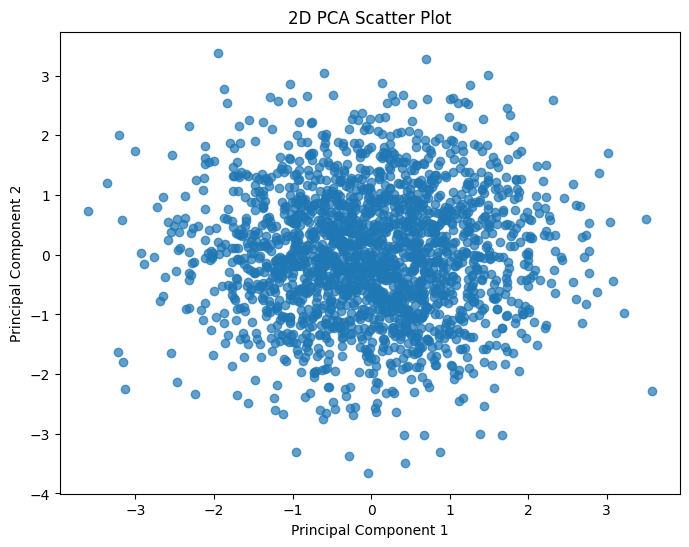

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data_pca[:,0], data_pca[:,1], alpha=0.7)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Scatter Plot")
plt.show()  ##clearly shows a no distinct useful clusters are formed when the categorical features are removed

In [178]:
#applying dbscan on reduced data
#defining the parameters 
number_of_features = 2
min_pts = 5 ##from literature min_pts can be taken as 5 for 2D data
neigh = NearestNeighbors(n_neighbors = min_pts)  #initializing model with 'min_pts' number of neighbours
neigh.fit(data_pca) ##fitting model with my scaled dataset 
distance, _ = neigh.kneighbors(data_pca)   ##finding k nearest neighbours for each sample ignoring the indices of the nearest neighbors
distance

array([[0.        , 0.03546203, 0.0451924 , 0.07192509, 0.08332483],
       [0.        , 0.03947606, 0.05081796, 0.05109906, 0.05730036],
       [0.        , 0.01961586, 0.09984607, 0.11895494, 0.12159824],
       ...,
       [0.        , 0.00818033, 0.03882775, 0.05381086, 0.08051817],
       [0.        , 0.12350722, 0.17560415, 0.17678027, 0.18718362],
       [0.        , 0.01669122, 0.01745054, 0.02637565, 0.06574757]],
      shape=(2000, 5))

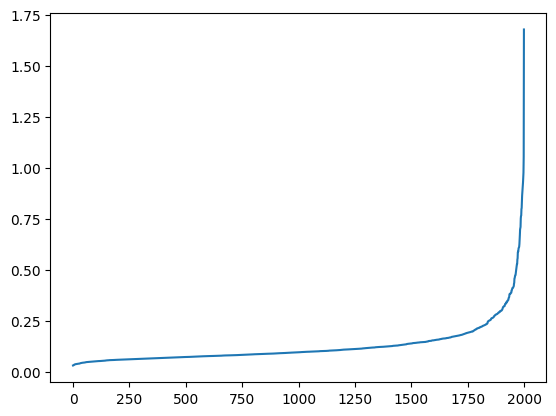

In [179]:
distance = np.sort(distance[:, min_pts-1])
plt.plot(distance)

In [188]:
epsilon = 0.26  ##identifying elbow from PCA data 
dbscan = DBSCAN(eps = epsilon, min_samples = min_pts)
clusters = dbscan.fit_predict(data_pca)
clusters

array([0, 0, 0, ..., 0, 0, 0], shape=(2000,))

In [189]:
pd.unique(clusters)  ##verifies most point are put in a single cluster and the rest are outliers as 
                     #reflected in the PCA graph

array([ 0, -1,  1])

In [190]:
data_clustered2_pca = data.copy();
data_clustered2_pca['cluster'] = clusters
data_clustered2_pca['mental_health_score'] = Y
data_clustered2_pca

,age,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,...,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day,gender_Female,gender_Male,gender_Other,location_type_Rural,location_type_Suburban,location_type_Urban,cluster
115,47,7.4,2.8,2.5,0.9,2.6,4.3,2.0,1.6,1.1,...,9,9,16.6,0.0,1.0,0.0,1.0,0.0,0.0,0
1779,16,7.0,1.8,2.0,1.3,0.4,2.2,0.9,3.9,0.0,...,17,8,14.4,0.0,1.0,0.0,0.0,1.0,0.0,0
1449,32,7.2,4.5,2.4,1.2,1.9,2.7,1.1,3.0,0.5,...,8,4,15.6,0.0,1.0,0.0,0.0,1.0,0.0,0
145,17,2.9,3.5,0.0,0.5,0.4,3.3,0.7,2.6,1.1,...,0,10,6.2,1.0,0.0,0.0,0.0,0.0,1.0,0
1009,51,7.7,0.7,1.4,1.8,2.0,1.2,0.0,2.2,0.6,...,10,19,6.3,0.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1393,58,8.2,3.3,0.0,1.0,2.4,3.1,3.3,3.8,1.0,...,14,1,8.5,1.0,0.0,0.0,0.0,0.0,1.0,0
1344,32,6.2,3.8,1.4,0.9,2.2,2.0,2.0,4.1,1.2,...,7,3,15.2,0.0,1.0,0.0,1.0,0.0,0.0,0
527,33,4.8,0.5,3.1,0.6,1.4,0.5,1.6,2.1,1.5,...,18,12,9.1,0.0,1.0,0.0,0.0,0.0,1.0,0
1149,53,3.5,0.0,1.9,0.6,0.0,1.8,0.5,5.3,1.5,...,6,15,5.7,1.0,0.0,0.0,0.0,0.0,1.0,0


In [192]:
summary = data_clustered2_pca.groupby("cluster")["mental_health_score"].agg(["mean", "median", "std", "count"])
summary   ##summarising the mental health score 

,mean,median,std,count
cluster,,,,
-1,48.287129,46.0,18.780488,101
0,49.724393,49.0,17.465718,1894
1,49.200000,43.0,25.173399,5


In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(data_clustered2_pca, clusters)
print("Silhouette Score:", score)  ##clustering close to 0 

Silhouette Score: 0.022211247916909965
